In [25]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from data_simulation import get_data_1
from utils import get_measures


In [26]:
settings = {}
settings[1] = {"var_likelihood": 0.025}
settings[2] = {"var_likelihood": 1.0}


In [27]:
simulation_i = "1"
setting_i = 2
var_likelihood = settings[setting_i]["var_likelihood"]


In [28]:
# set seed
seed = 0
np.random.seed(seed)

# get data
d_x = 20  # number of fourier features
n_train = 100
n_test = 10000
X_train, Y_train, X_train_orig = get_data_1(
    d_x=d_x, n_data=n_train, variance=var_likelihood
)
X_test, Y_test, X_test_orig = get_data_1(
    d_x=d_x, n_data=n_test, variance=var_likelihood
)


In [29]:
lambs = np.linspace(0.1, 0.2, 5)


In [30]:
var_prior_1 = 0.01
var_prior_2 = 0.1
var_prior_3 = 1.0

log_risks_1, r_log_risks_1, emp_r_log_risks_1, kls_1, vars_prior_pred_1 = get_measures(
    var_prior_1, var_likelihood, X_train, Y_train, X_test, Y_test, lambs
)
log_risks_2, r_log_risks_2, emp_r_log_risks_2, kls_2, vars_prior_pred_2 = get_measures(
    var_prior_2, var_likelihood, X_train, Y_train, X_test, Y_test, lambs
)
log_risks_3, r_log_risks_3, emp_r_log_risks_3, kls_3, vars_prior_pred_3 = get_measures(
    var_prior_3, var_likelihood, X_train, Y_train, X_test, Y_test, lambs
)


0.1
0.125


/Users/nsq277/Desktop/cold_pacbayes/cold-posteriors-and-pacbayes/utils.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var_prior = torch.tensor(var_prior)
/Users/nsq277/Desktop/cold_pacbayes/cold-posteriors-and-pacbayes/utils.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var_likelihood = torch.tensor(var_likelihood)


0.15000000000000002
0.17500000000000002
0.2
0.1
0.125
0.15000000000000002
0.17500000000000002
0.2
0.1
0.125
0.15000000000000002
0.17500000000000002
0.2


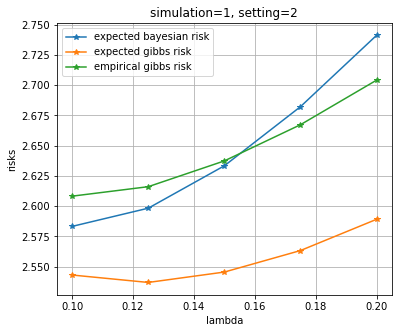

In [31]:
fig = plt.figure(figsize=(6, 5))
plt.grid()
plt.plot(lambs, log_risks_1, "-*", label="expected bayesian risk")
plt.plot(lambs, r_log_risks_1, "-*", label="expected gibbs risk")
plt.plot(lambs, emp_r_log_risks_1, "-*", label="empirical gibbs risk")
plt.xlabel("lambda")
plt.ylabel("risks")
plt.title(f"simulation={simulation_i}, setting={setting_i}")
plt.legend()
plt.savefig(f"{simulation_i}_risks_{setting_i}.jpg", bbox_inches="tight")
plt.show()


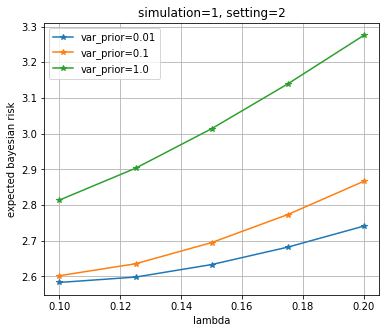

In [32]:
fig = plt.figure(figsize=(6, 5))
plt.grid()
plt.plot(lambs, log_risks_1, "-*", label=f"var_prior={var_prior_1}")
plt.plot(lambs, log_risks_2, "-*", label=f"var_prior={var_prior_2}")
plt.plot(lambs, log_risks_3, "-*", label=f"var_prior={var_prior_3}")
plt.xlabel("lambda")
plt.ylabel("expected bayesian risk")
plt.title(f"simulation={simulation_i}, setting={setting_i}")
plt.legend()
plt.savefig(f"{simulation_i}_bayes_risks_{setting_i}.jpg", bbox_inches="tight")
plt.show()


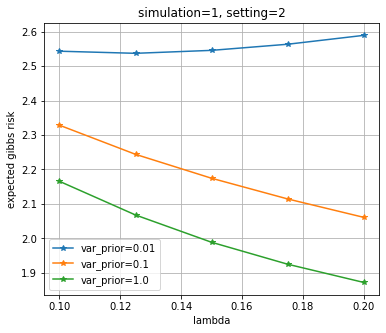

In [33]:
fig = plt.figure(figsize=(6, 5))
plt.grid()
plt.plot(lambs, r_log_risks_1, "-*", label=f"var_prior={var_prior_1}")
plt.plot(lambs, r_log_risks_2, "-*", label=f"var_prior={var_prior_2}")
plt.plot(lambs, r_log_risks_3, "-*", label=f"var_prior={var_prior_3}")
plt.xlabel("lambda")
plt.ylabel("expected gibbs risk")
plt.title(f"simulation={simulation_i}, setting={setting_i}")
plt.legend()
plt.savefig(f"{simulation_i}_gibbs_risks_{setting_i}.jpg", bbox_inches="tight")
plt.show()


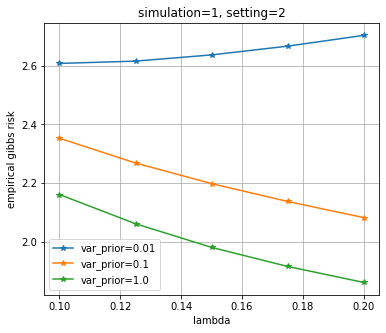

In [34]:
fig = plt.figure(figsize=(6, 5))
plt.grid()
plt.plot(lambs, emp_r_log_risks_1, "-*", label=f"var_prior={var_prior_1}")
plt.plot(lambs, emp_r_log_risks_2, "-*", label=f"var_prior={var_prior_2}")
plt.plot(lambs, emp_r_log_risks_3, "-*", label=f"var_prior={var_prior_3}")
plt.xlabel("lambda")
plt.ylabel("empirical gibbs risk")
plt.title(f"simulation={simulation_i}, setting={setting_i}")
plt.legend()
plt.savefig(f"{simulation_i}_emp_gibbs_risks_{setting_i}.jpg", bbox_inches="tight")
plt.show()


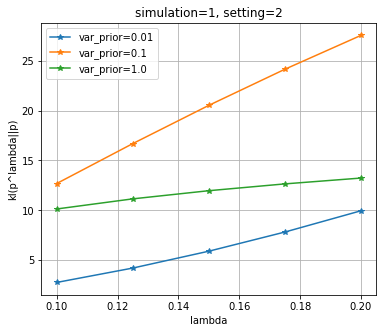

In [35]:
fig = plt.figure(figsize=(6, 5))
plt.grid()
plt.plot(lambs, kls_1, "-*", label=f"var_prior={var_prior_1}")
plt.plot(lambs, kls_2, "-*", label=f"var_prior={var_prior_2}")
plt.plot(lambs, kls_3, "-*", label=f"var_prior={var_prior_3}")
plt.xlabel("lambda")
plt.ylabel("kl(p^lambda||p)")
plt.title(f"simulation={simulation_i}, setting={setting_i}")
plt.legend()
plt.savefig(f"{simulation_i}_kls_{setting_i}.jpg", bbox_inches="tight")
plt.show()


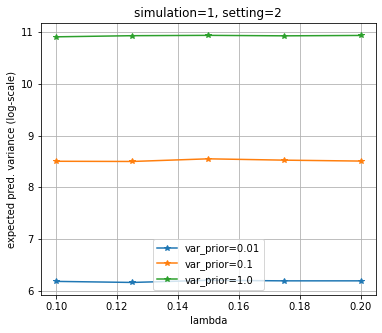

In [36]:
fig = plt.figure(figsize=(6, 5))
plt.grid()
plt.plot(lambs, np.log(vars_prior_pred_1), "-*", label=f"var_prior={var_prior_1}")
plt.plot(lambs, np.log(vars_prior_pred_2), "-*", label=f"var_prior={var_prior_2}")
plt.plot(lambs, np.log(vars_prior_pred_3), "-*", label=f"var_prior={var_prior_3}")
plt.xlabel("lambda")
plt.ylabel("expected pred. variance (log-scale)")
plt.title(f"simulation={simulation_i}, setting={setting_i}")
plt.legend()
plt.savefig(f"{simulation_i}_var_{setting_i}.jpg", bbox_inches="tight")
plt.show()
